<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement

**PROBLEM STATEMENT:**  We are from the data science team at Ministry of Education of the United States of America. We are trying to improve the participation rates and scores of the country. Hence, this project seeks to identify the underachieving states that have low participation rates and low mean scores in order to focus more attention to these states that require more help.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**SELECTED DATASETS:**
I have selected act_2018.csv, act_2019.csv, sat_2018.csv, sat_2019.csv for this project. For the act datasets, it contains the states, participation rates and composite scores. For the sat datasets, it contains the states, participation rates, evidence-based reading and writing scores, math scores and total scores. All scores are assumed to be the average for the state.

### Outside Research

Since I already know that the SATs or ACTs were not mandatory after researching on their websites which clearly states them. Instead it was encouraged to do them. However, I was still curious to find out if there are states in the country that require students to take these tests in order to graduate from High School. Indeed from this article (source: https://www.edweek.org/teaching-learning/which-states-require-students-to-take-the-sat-or-act), there are some states that require participation in these tests. Hence from here we will be able to begin to understand why some states have lower participation rates than others. Furthermore, we can then decide which of these states that require participation and yet their students are not performing. 

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
sat19 = pd.read_csv('data/sat_2019.csv')
sat18 = pd.read_csv('data/sat_2018.csv')
act19 = pd.read_csv('data/act_2019.csv')
act18 = pd.read_csv('data/act_2018.csv')

In [3]:
sat19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [4]:
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [5]:
#check for extra values in sat19
sat19[sat19['State'].isin(sat18['State'])== False]

,State,Participation Rate,EBRW,Math,Total
39,Puerto Rico,—,483,462,944
47,Virgin Islands,—,490,445,935


In [6]:
##dropping the Puerto Rico and Virgin islands to ensure consistency throughout the datasets
sat19.drop( index = [39,47], inplace = True) 
# #resetting the index as the dropped index(s) does not reset by itself
sat19.reset_index(drop = True, inplace=True)

In [7]:
# #renaming the columns 
sat18.rename(columns = {'Evidence-Based Reading and Writing':'EBRW'}, inplace = True) 
sat19.rename(columns = {'Participation Rate':'Participation'}, inplace = True)

In [8]:
#function to find the mean for dataframe. input the desired dataframe and series
def mean(list_of_numbers_mean):
    count = 0
    for i in list_of_numbers_mean:
        count += i
    return count/(len(list_of_numbers_mean))

In [9]:
#function to find the standard deviation manually.
def standard_deviation(list_of_numbers_sd):
    summation = 0
    for i in list_of_numbers_sd:
        summation += (i - mean(list_of_numbers_sd))**2
    sd = (1/len(list_of_numbers_sd)) * summation
    return sd**0.5

In [10]:
def pct_to_flt(dataframe, series):
    each_value = []
    for val in dataframe[series]:
        val = val.split('%')
        each_value.append(float(val[0])/100)
    return each_value
pct_to_flt(sat19,'Participation')

# sat19.head()

[0.07,
 0.41,
 0.31,
 0.06,
 0.63,
 1.0,
 1.0,
 1.0,
 0.94,
 1.0,
 0.71,
 0.54,
 1.0,
 1.0,
 0.66,
 0.03,
 0.04,
 0.04,
 0.05,
 0.99,
 0.82,
 0.81,
 1.0,
 0.04,
 0.03,
 0.04,
 0.09,
 0.03,
 0.2,
 0.95,
 0.82,
 0.18,
 0.79,
 0.51,
 0.02,
 0.19,
 0.22,
 0.51,
 0.7,
 1.0,
 0.68,
 0.03,
 0.07,
 0.68,
 0.04,
 0.66,
 0.68,
 0.7,
 0.99,
 0.03,
 0.03]

--- 
# EDA
---

## Data Import and Cleaning

In [11]:
#1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
sat18.head()

,State,Participation,EBRW,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [12]:
#1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
sat19.head()

,State,Participation,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [13]:
#1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
act18.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [14]:
#1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
act19.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [15]:
#2. Check for missing values.
sat18.isnull().sum()

State            0
Participation    0
EBRW             0
Math             0
Total            0
dtype: int64

In [16]:
#2. Check for missing values.
sat19.isnull().sum()

State            0
Participation    0
EBRW             0
Math             0
Total            0
dtype: int64

In [17]:
#2. Check for missing values.
act18.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [18]:
#2. Check for missing values.
act19.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [19]:
#3. Check for any obvious issues with the observations.
sat18.duplicated().sum()

0

In [20]:
#3. Check for any obvious issues with the observations.
sat19.duplicated().sum()

0

In [21]:
#3. Check for any obvious issues with the observations. There is 1 duplicated state here.
act18.duplicated().sum()

1

In [22]:
#3. Finding out which index does the duplicate is in.
act18.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
dtype: bool

In [23]:
#drop duplicated index
act18.drop_duplicates(subset='State', keep = 'first', inplace = True)

In [24]:
# #resetting the index as the dropped index(s) does not reset by itself
act18.reset_index(drop = True, inplace=True)
act18.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [25]:
#checking for duplicates
act19.duplicated().sum()

0

In [26]:
#checking the count for all columns
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          51 non-null     object
 1   Participation  51 non-null     object
 2   EBRW           51 non-null     int64 
 3   Math           51 non-null     int64 
 4   Total          51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [27]:
# checkign the count for all columns
act18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     object 
 2   Composite      51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [28]:
#check for extra values in act18 in sat18
act18[act18['State'].isin(sat18['State'])== False]

,State,Participation,Composite
8,District of columbia,32%,23.6


In [29]:
#check for extra values in act18 in sat19
act18[act18['State'].isin(sat19['State'])== False]

,State,Participation,Composite
8,District of columbia,32%,23.6


In [30]:
#check for extra values in act19 in act18
act19[act19['State'].isin(act18['State'])== False]


,State,Participation,Composite
8,District of Columbia,32%,23.5
51,National,52%,20.7


In [31]:
#check for extra values in sat18 in sat19
sat18[sat18['State'].isin(sat19['State'])== False]

,State,Participation,EBRW,Math,Total


In [32]:
#check for extra values in sat19 in sat18
sat19[sat19['State'].isin(sat18['State'])== False]

,State,Participation,EBRW,Math,Total


In [33]:
#dropped due to consistency throughout the datasets
act18.drop(index = 8,axis = 0, inplace=True)
act18.reset_index(drop = True, inplace=True)

In [34]:
#check for extra values in act19 in sat19
act19[act19['State'].isin(sat19['State'])== False]

,State,Participation,Composite
51,National,52%,20.7


In [35]:
#check for extra values in sat19 in act18
sat19[sat19['State'].isin(act18['State'])== False]

,State,Participation,EBRW,Math,Total
8,District of Columbia,94%,495,480,975


In [36]:
#check for extra values in act19 in act19
sat19[sat19['State'].isin(act19['State'])== False]

,State,Participation,EBRW,Math,Total


In [37]:
#dropped due to consistency throughout the datasets
act19.drop(index = 51, axis = 0, inplace=True)
act19.drop(index = 8, axis = 0, inplace=True)
act19.reset_index(drop = True, inplace=True)
act19

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6
5,Colorado,27%,23.8
6,Connecticut,22%,25.5
7,Delaware,13%,24.1
8,Florida,54%,20.1
9,Georgia,49%,21.4


In [38]:
#dropped due to consistency throughout the datasets
sat19.drop(index = 8, axis = 0, inplace=True)
sat19.reset_index(drop = True, inplace=True)

In [39]:
#check for extra values in act19 in act19
sat18[sat18['State'].isin(act18['State'])== False]

,State,Participation,EBRW,Math,Total
8,District of Columbia,92%,497,480,977


In [40]:
#check for extra values in act19 in act19
sat18[sat18['State'].isin(act19['State'])== False]

,State,Participation,EBRW,Math,Total
8,District of Columbia,92%,497,480,977


In [41]:
#dropped due to consistency throughout the datasets
sat18.drop(index = 8, axis = 0, inplace=True)
sat18.reset_index(drop = True, inplace=True)

In [42]:
#checking for count in all columns to be the same
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          50 non-null     object
 1   Participation  50 non-null     object
 2   EBRW           50 non-null     int64 
 3   Math           50 non-null     int64 
 4   Total          50 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [43]:
#checking for count in all columns to be the same
sat19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          50 non-null     object
 1   Participation  50 non-null     object
 2   EBRW           50 non-null     int64 
 3   Math           50 non-null     int64 
 4   Total          50 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [44]:
#checking for count in all columns to be the same
act18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          50 non-null     object 
 1   Participation  50 non-null     object 
 2   Composite      50 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [45]:
#checking for count in all columns to be the same
act19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          50 non-null     object 
 1   Participation  50 non-null     object 
 2   Composite      50 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [46]:
# changing the from % to decimal using the func earlier

sat18['Participation'] = pct_to_flt(sat18,'Participation')
sat18.head()

,State,Participation,EBRW,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [47]:
# changing the from % to decimal using the func earlier
sat19['Participation'] = pct_to_flt(sat19,'Participation')
sat19.head()

,State,Participation,EBRW,Math,Total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [48]:
# changing the from % to decimal using the func earlier

act18['Participation'] = pct_to_flt(act18,'Participation')
act18.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [49]:
# changing the from % to decimal using the func earlier

act19['Participation'] = pct_to_flt(act19,'Participation')
act19.head()

,State,Participation,Composite
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


In [50]:
#check if datatype is correct
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          50 non-null     object 
 1   Participation  50 non-null     float64
 2   EBRW           50 non-null     int64  
 3   Math           50 non-null     int64  
 4   Total          50 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [51]:
#check if datatype is correct
sat19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          50 non-null     object 
 1   Participation  50 non-null     float64
 2   EBRW           50 non-null     int64  
 3   Math           50 non-null     int64  
 4   Total          50 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [52]:
sat18.rename(columns = {'State': 'state',
                        'Participation':'participation', 
                        'EBRW':'ebrw', 
                        'Math':'math',
                        'Total':'total'}, inplace = True) 
sat19.rename(columns = {'State': 'state',
                        'Participation':'participation', 
                        'EBRW':'ebrw', 
                        'Math':'math',
                        'Total':'total'}, inplace = True) 
act18.rename(columns = {'State': 'state',
                        'Participation':'participation', 
                        'Composite':'composite',}, inplace = True) 
act19.rename(columns = {'State': 'state',
                        'Participation':'participation', 
                        'Composite':'composite',}, inplace = True) 

In [53]:
#check for lowercase column names
sat18.head()

,state,participation,ebrw,math,total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [54]:
#check for lowercase column names
sat19.head()

,state,participation,ebrw,math,total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [55]:
#check for lowercase column names
act18.head()

,state,participation,composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [56]:
#check for lowercase column names
act19.head()

,state,participation,composite
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


In [57]:
#9. Merge dataframes that can be merged.ACT left join.
act_merge = pd.merge(act18, act19, on='state', how='left')

In [58]:
#9. Merge dataframes that can be merged.SAT left join.
sat_merge = pd.merge(sat18, sat19, on='state', how='left')

In [59]:
#rename the merged datasets
sat_merge.rename(columns = {'state': 'state',
                        'participation_x':'participation_sat_18', 
                        'ebrw_x':'ebrw_sat_18', 
                        'math_x':'math_sat_18',
                        'total_x':'total_sat_18',
                        'participation_y':'participation_sat_19', 
                        'ebrw_y':'ebrw_sat_19', 
                        'math_y':'math_sat_19',
                        'total_y':'total_sat_19', }, inplace = True) 
act_merge.rename(columns = {'state': 'state',
                        'participation_x':'participation_act_18', 
                        'composite_x':'composite_act_18',
                        'participation_y':'participation_act_19', 
                        'composite_y':'composite_act_19', }, inplace = True) 

In [60]:
#merged both sat_merge and act_merge on an outer join. i think its easier to retrieve data this way
act_sat_merge = pd.merge(act_merge, sat_merge, on='state', how='left')
act_sat_merge.head()

,state,participation_act_18,composite_act_18,participation_act_19,composite_act_19,participation_sat_18,ebrw_sat_18,math_sat_18,total_sat_18,participation_sat_19,ebrw_sat_19,math_sat_19,total_sat_19
0,Alabama,1.00,19.1,1.00,18.9,0.06,595,571,1166,0.07,583,560,1143
1,Alaska,0.33,20.8,0.38,20.1,0.43,562,544,1106,0.41,556,541,1097
2,Arizona,0.66,19.2,0.73,19.0,0.29,577,572,1149,0.31,569,565,1134
3,Arkansas,1.00,19.4,1.00,19.3,0.05,592,576,1169,0.06,582,559,1141
4,California,0.27,22.7,0.23,22.6,0.60,540,536,1076,0.63,534,531,1065


## Further EDA

In [61]:
# Lowest participation rate for SAT 2018
act_sat_merge.sort_values('participation_sat_18')[['state','participation_sat_18','total_sat_18']].head()

,state,participation_sat_18,total_sat_18
33,North Dakota,0.02,1283
49,Wyoming,0.03,1257
40,South Dakota,0.03,1240
26,Nebraska,0.03,1252
48,Wisconsin,0.03,1294


In [62]:
# Lowest participation rate for SAT 2019
act_sat_merge.sort_values('participation_sat_19')[['state','participation_sat_19','total_sat_19']].head()

,state,participation_sat_19,total_sat_19
33,North Dakota,0.02,1263
49,Wyoming,0.03,1238
40,South Dakota,0.03,1268
26,Nebraska,0.03,1260
48,Wisconsin,0.03,1283


In [63]:
# Lowest participation rate for ACT 2018
act_sat_merge.sort_values('participation_act_18')[['state','participation_act_18','composite_act_18']].head()

,state,participation_act_18,composite_act_18
18,Maine,0.07,24.0
38,Rhode Island,0.15,24.2
28,New Hampshire,0.16,25.1
7,Delaware,0.17,23.8
37,Pennsylvania,0.20,23.5


In [64]:
#Lowest participation rate for ACT 2019
act_sat_merge.sort_values('participation_act_19')[['state','participation_act_19','composite_act_19']].head()

,state,participation_act_19,composite_act_19
18,Maine,0.06,24.3
38,Rhode Island,0.12,24.7
7,Delaware,0.13,24.1
28,New Hampshire,0.14,25.0
37,Pennsylvania,0.17,23.6


Here we can already see that the lowest participation rate for SAT for the 2 years 2018 and 2019. It shows the same states that occupy these positions. The SAT and ACT are not of a compulsory nature in certain areas, the students in these states may have intentionally decided not to take the SATs and ACTs. Hence, the low participation rate for these areas.

Also to note that the scores shown for both SAT and ACT are around the 75th percentile of the country. This shows that the students are high achieving or the schools that they are enrolled in have better resources to educate and prepare the students for the tests.

In [65]:
# Highest participation rate for SAT 2018
act_sat_merge.sort_values('participation_sat_18', ascending = False)[['state','participation_sat_18','total_sat_18']].head(10)

,state,participation_sat_18,total_sat_18
5,Colorado,1.00,1025
6,Connecticut,1.00,1053
7,Delaware,1.00,998
21,Michigan,1.00,1011
11,Idaho,1.00,1001
18,Maine,0.99,1013
12,Illinois,0.99,1019
38,Rhode Island,0.97,1018
28,New Hampshire,0.96,1063
29,New Jersey,0.82,1094


In [66]:
# Highest participation rate for SAT 2019
act_sat_merge.sort_values('participation_sat_19', ascending = False)[['state','participation_sat_19','total_sat_19']].head(10)

,state,participation_sat_19,total_sat_19
21,Michigan,1.00,1003
5,Colorado,1.00,1024
6,Connecticut,1.00,1046
7,Delaware,1.00,985
8,Florida,1.00,999
11,Idaho,1.00,993
12,Illinois,1.00,1013
38,Rhode Island,1.00,995
47,West Virginia,0.99,943
18,Maine,0.99,1013


In [67]:
# Highest participation rate for ACT 2018
act_sat_merge.sort_values('participation_act_18', ascending = False)[['state','participation_act_18','composite_act_18']].head()

,state,participation_act_18,composite_act_18
0,Alabama,1.0,19.1
16,Kentucky,1.0,20.2
48,Wisconsin,1.0,20.5
43,Utah,1.0,20.4
41,Tennessee,1.0,19.6


In [68]:
# Highest participation rate for ACT 2019
act_sat_merge.sort_values('participation_act_19', ascending = False)[['state','participation_act_19','composite_act_19']].head()

,state,participation_act_19,composite_act_19
0,Alabama,1.0,18.9
16,Kentucky,1.0,19.8
48,Wisconsin,1.0,20.3
43,Utah,1.0,20.3
41,Tennessee,1.0,19.4


We can see here that it is generally the same few states that have the highest participation rates for SAT in 2018 and 2019. #I have yet to find out a reason for why it has such good participation rates. (need to find out) ***

In [69]:
#decided to drop the ebrw and math as it feels too cluttered and i did not require these columns for my goal.
act_sat_merge.drop(['ebrw_sat_18','math_sat_18','ebrw_sat_19','math_sat_19'], axis = 1, inplace = True)

In [156]:
act_sat_merge.head()

,state,participation_act_18,composite_act_18,participation_act_19,composite_act_19,participation_sat_18,total_sat_18,participation_sat_19,total_sat_19
0,Alabama,1.00,19.1,1.00,18.9,0.06,1166,0.07,1143
1,Alaska,0.33,20.8,0.38,20.1,0.43,1106,0.41,1097
2,Arizona,0.66,19.2,0.73,19.0,0.29,1149,0.31,1134
3,Arkansas,1.00,19.4,1.00,19.3,0.05,1169,0.06,1141
4,California,0.27,22.7,0.23,22.6,0.60,1076,0.63,1065


## Visualize the Data

In [117]:
#setting plot parameters
plt.style.use('tableau-colorblind10')
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 14
sns.set(font_scale=2)

<AxesSubplot:>

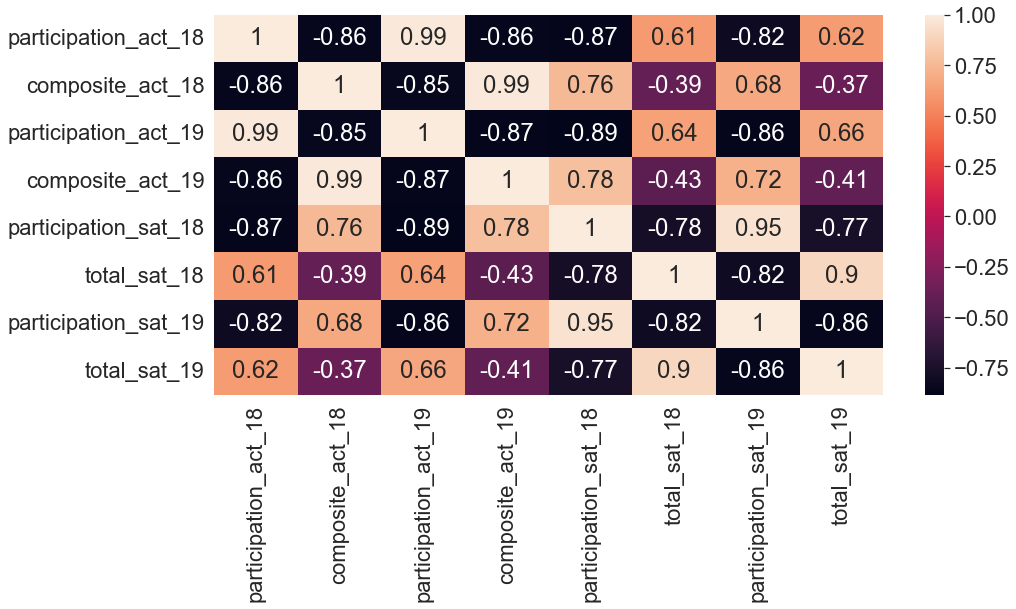

In [118]:
#the correlation between each variable
act_sat_corr = act_sat_merge.corr()
sns.heatmap(act_sat_corr, annot = True)

Here is a heat map showing correlations between the participation rates and scores. We will be looking at those with positive correlations of more than 0.75 and negative correlations of less than -0.75. These are important as they show the relationship between each factor/variable.

0.6232
21.454


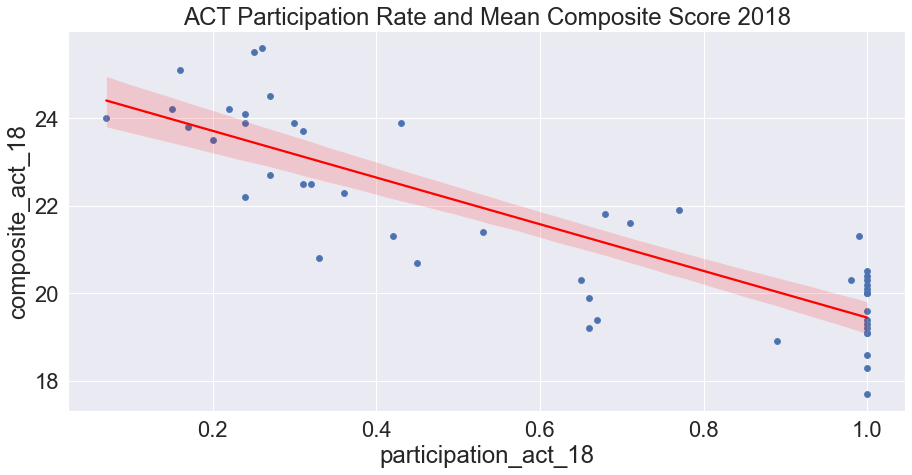

In [126]:
print(act_sat_merge['participation_act_18'].mean()) # used the mean as a basis to find out low participation
print(act_sat_merge['composite_act_18'].mean()) # used the mean as a basis to find out low composite scores
sns.scatterplot(data = act_sat_merge,
               x = 'participation_act_18', 
               y='composite_act_18',).set(title='ACT Participation Rate and Mean Composite Score 2018',
            )
# setting estimated regression line
sns.regplot(data = act_sat_merge,
            x = 'participation_act_18', 
            y='composite_act_18',
         line_kws={"color": "red"})

 
# used the mean as a guide to see which states are underperforming and has low participation
# act_sat_merge[(act_sat_merge.participation_act_18 < 0.6) & (act_sat_merge.composite_act_18 < 21.4)]

plt.savefig('ACT_2018.png') 

You can see an inverse relationship with the composite score and participation rates. The line that cuts across diagonally show this. What this means is that the higher the participation rate, the lower the composite score.

0.5920000000000001
21.423999999999996


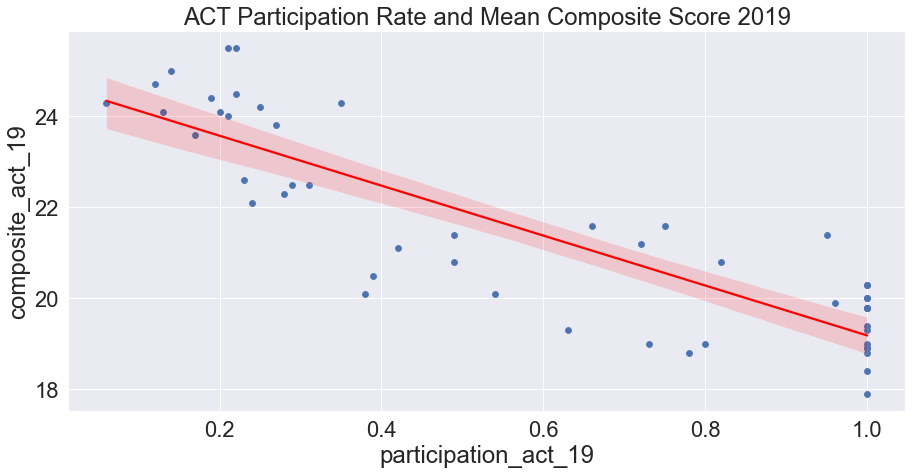

In [125]:
print(act_sat_merge['participation_act_19'].mean()) # used the mean as a basis to find out low participation
print(act_sat_merge['composite_act_19'].mean())# used the mean as a basis to find out low composite scores
sns.scatterplot(data = act_sat_merge,
               x = 'participation_act_19', 
                   y='composite_act_19',).set(title = 'ACT Participation Rate and Mean Composite Score 2019')

# setting estimated regression line
sns.regplot(data = act_sat_merge,
            x = 'participation_act_19', 
            y='composite_act_19',
         line_kws={"color": "red"})
#used the mean as a guide to see which states are underperforming and has low participation
# act_sat_merge[(act_sat_merge.participation_act_19 < 0.6) & (act_sat_merge.composite_act_19 < 21.4)] 
plt.savefig('ACT_2019.png')

0.44819999999999993
1122.88


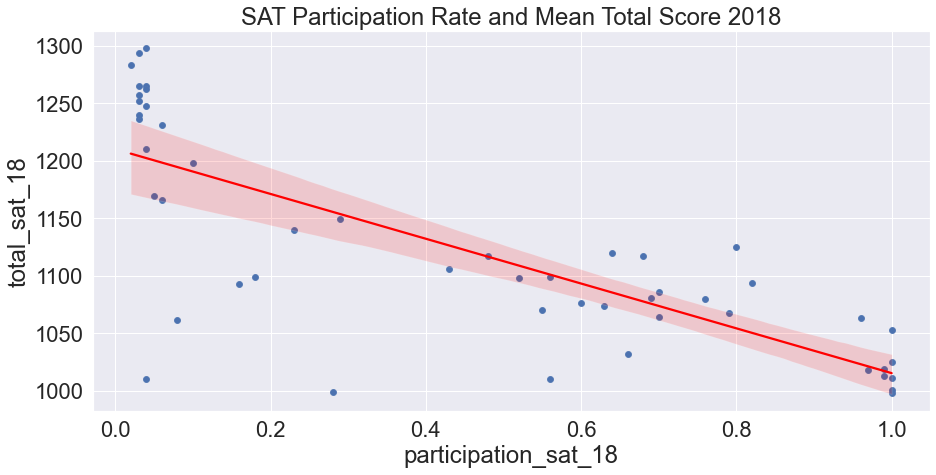

In [128]:
print(act_sat_merge['participation_sat_18'].mean())
print(act_sat_merge['total_sat_18'].mean())
sns.scatterplot(data = act_sat_merge,
               x = 'participation_sat_18', 
                   y='total_sat_18',).set(title = 'SAT Participation Rate and Mean Total Score 2018')

# setting estimated regression line
sns.regplot(data = act_sat_merge,
            x = 'participation_sat_18', 
            y='total_sat_18',
         line_kws={"color": "red"})

#used the mean as a guide to see which states are underperforming and has low participation
# print(act_sat_merge[(act_sat_merge.participation_sat_18 < 0.44) & (act_sat_merge.total_sat_18 < 1122)])
plt.savefig('SAT_2018.png')

0.4816
1115.84


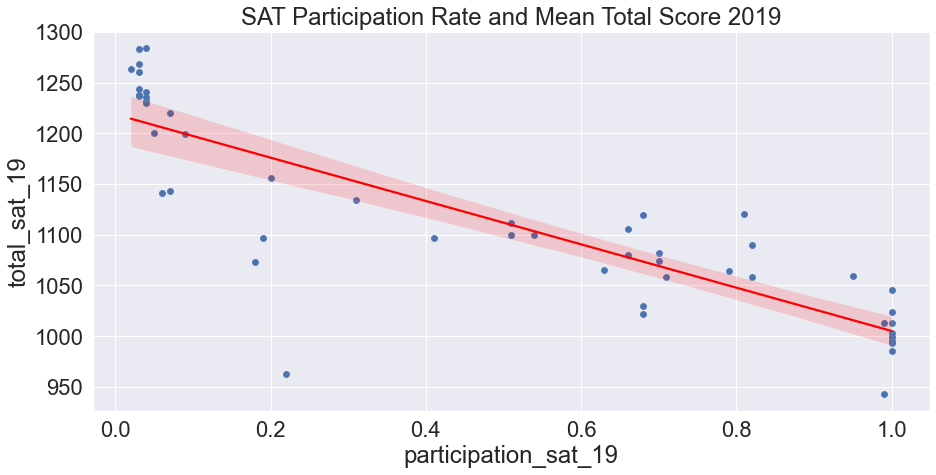

In [127]:
print(act_sat_merge['participation_sat_19'].mean())
print(act_sat_merge['total_sat_19'].mean())
sns.scatterplot(data = act_sat_merge,
               x = 'participation_sat_19', 
                   y='total_sat_19',).set(title = 'SAT Participation Rate and Mean Total Score 2019')

# setting estimated regression line
sns.regplot(data = act_sat_merge,
            x = 'participation_sat_19', 
            y='total_sat_19',
         line_kws={"color": "red"})
#used the mean as a guide to see which states are underperforming and has low participation
# act_sat_merge[(act_sat_merge.participation_sat_19 < 0.48) & (act_sat_merge.total_sat_19 < 1115)]
plt.savefig('SAT_2019.png')

As a whole the relationship with the 4 above graphs show an inverse relationship with the participation rates and their scores. This is evident with the regression line showing a negative relationship. Basically this means that the higher the participation the lower the score.

There are a couple of states that fall below the mean for both participation and their total scores in ACT 2019. For the states that had low participation rate and low composite scores,a few stood out and were consistent bad for the 2 years and these are Alaska, Oregan and Texas.

On the SAT tests, within 2 years the states that were consistently below the mean for participation and total scores are Ohio and Oklahoma. 


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

Some findings from these few datasets were that although some states had the lower participation rates they tend to do really well and in these states they do not require to take either of the tests. Meaning that these students are either academically inclined and they have a strong desire to go to college which in return gets them the good scores. 

On the other hand the states that had higher participation rates some of them had below average scores. As most of these states had some kind of requirement to take either tests and complete the exit school exam. The students may have decided to complete either tests as a formality as their exit school exam takes priority.

We have also found a few underachieving states that have low participation rates and low mean scores. We have broken up these few schools into 2 groups. One group that the states do not require the students to be taking the ACT or SAT. The second group, the states that require taking the SAT or ACT.

For those schools (Alaska, Oregon and Texas) that does not require the SAT or ACT, they could be encouraged to take it up as the current indication is that in general their students are not doing very well in schools. Our recommendation will be to focus on these states and improving their programs. Encouraging the students to take up the test so that they will be college ready.

For those which require SAT or ACT (Ohio and Oklahoma), these are the states that should be focused on. Hence, it is our recommendation to look into these states and help them as much as possible.

